In [14]:
!pip install PyPDF2
!pip install py-readability-metrics
!pip install wordcloud

In [15]:
import nltk as nltk
from readability import Readability as rd
from nltk.tokenize import word_tokenize
from bs4 import BeautifulSoup as bs
import requests
from wordcloud import WordCloud, STOPWORDS
import re
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
import string
from readability.exceptions import ReadabilityException
from PyPDF2 import PdfReader
import matplotlib.pyplot as plt

In [16]:
import PyPDF2

In [17]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\payal\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\payal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\payal\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [18]:
pdf_reader = PdfReader(r'C:\Users\payal\OneDrive\Desktop\Semester 2\Advanced_Prog\Assignment 1\file1.pdf')
pdf_reader2 = PdfReader(r'C:\Users\payal\OneDrive\Desktop\Semester 2\Advanced_Prog\Assignment 1\file2.pdf')

In [19]:
text1 = pdf_reader
text2 = pdf_reader2

The first article speaks about allegations of plagiarism against the President of Harvard University. The article elaborates how she has cited the work of numerous writers and colleauges in her work. Even though there is a history of such allegations against the President, the University stands by her and supports her.

The second article speaks about President Gay testifying along with others regarding this accusations. It also outlines other difficulties she has faced since attaining title. The emphasis of the article is on her submitting edits to her work after these plagiarism charges.

In [20]:
num_pages = len(text1.pages)
num_pages2 = len(text2.pages)

In [48]:
for page_num in range(num_pages):
    # Get a specific page
    page = text1.pages[page_num]
    
    # Extract text from the page
    text11 += page.extract_text()
    
    # Print the text
    print(text11)

5 / 5
2023-24 NFL playof f odds: Every team's odds to make the postseason
 
 1 / 5Brian FloodEmbattled Harvard University President Claudine Gay hit
with more plagiarism charges
foxnews.com /media/embattled-harvard-university-president-claudine-gay-hit-more-plagiarism-charges
Media
Harvard ‘received a complaint outlining over 40 allegations of
plagiarism,’ according to the Free Beacon
 By Brian Flood  Fox News
Published December 20, 2023 12:59pm EST
Harvard president facing 40 new allegations of plagiarism
Fox News' Molly Line reports the latest on the allegations. 
Embattled Harvard University President Claudine Gay  has been slapped with additional
charges of plagiarism. 
The Washington Free Beacon  reported Harvard "received a complaint outlining over 40
allegations of plagiarism" against Gay on T uesday , noting a letter was sent to Harvard's
research integrity of ficer, Stacey Springs, outlining the claims. 
"The document paints a picture of a pattern of misconduct more extensive 

In [49]:
for page_num2 in range(num_pages2):
    # Get a specific page
    page2 = text2.pages[page_num2]
    
    # Extract text from the page
    text22 += page2.extract_text()
    
    # Print the text
    print(text22)

3 / 3Acquire Licensing Rights , opens new tab
Gabriella Borter
Thomson Reuters
Gabriella Borter is a reporter on the U.S. National Af fairs team, covering cultural and political
issues as well as breaking news. She has won two Front Page A wards from the
Newswomen’ s Club of New Y ork - in 2020 for her beat reporting on healthcare workers
during the COVID-19 pandemic, and in 2019 for her spot story on the firing of the police
officer who killed Eric Garner . The latter was also a Deadline Club A wards finalist. She holds
a B.A. in English from Y ale University and joined Reuters in 2017.
 
 1 / 3Gabriella BorterHarvard president will submit dissertation edits after
plagiarism allegations
reuters.com /world/us/embattled-harvard-president-will-submit-dissertation-edits-after-plagiarism-2023-12-21
Harvard University President Claudine Gay testifies before a House Education and The
Workforce Committee hearing titled "Holding Campus Leaders Accountable and Confronting
Antisemitism" on Capit

Briefly note any anomalies in your notebook:
The spaces in the headlines are not caught properly. Some other lines in the text also do not have proper spacing.

In [50]:
sid1 = SentimentIntensityAnalyzer()
sid1.polarity_scores(text11)

{'neg': 0.064, 'neu': 0.868, 'pos': 0.069, 'compound': 0.7243}

In [51]:
sid = SentimentIntensityAnalyzer()
sid.polarity_scores(text22)

{'neg': 0.073, 'neu': 0.899, 'pos': 0.028, 'compound': -0.9946}

Compare the results from the two articles 

The first article has a postive compound score which means it has a positive sentiment. The second artilce has a negative compound score which points to a negative sentiment. Both the articles revolve around the same topic and yet they have a different sentiment score. This is because of they way and tone in which they were written.

According to me both the artiles have a negative sentiment even though the first article shows a positive compound score.

In [52]:
with open('C:/Users/payal/OneDrive/Desktop/Semester 2/Advanced_Prog/Assignment 1/file1.pdf', 'rb') as file:
    # Create a PDF reader object
    pdf_reader_headline = PyPDF2.PdfReader(file)
    
    # Extract text from the first page
    if len(pdf_reader_headline.pages) > 0:
        first_page_text = pdf_reader_headline.pages[0].extract_text()
        
        # Extract the first two lines as the headline
        lines = first_page_text.split('\n')
        headline = '\n'.join(lines[:2]).strip()

# Print the extracted headline
print("First two lines:", headline)

First two lines: 1 / 5Brian FloodEmbattled Harvard University President Claudine Gay hit
with more plagiarism charges


In [53]:
sid2 = SentimentIntensityAnalyzer()
sid2.polarity_scores(headline)

{'neg': 0.178, 'neu': 0.822, 'pos': 0.0, 'compound': -0.3353}

The headline of the first article shows a negative compound score but the sentiment score for the entire article was positive. Thus the headline score does not match with the overall score.

In [54]:
with open('C:/Users/payal/OneDrive/Desktop/Semester 2/Advanced_Prog/Assignment 1/file2.pdf', 'rb') as file:
    # Create a PDF reader object
    pdf_reader_headline2 = PyPDF2.PdfReader(file)
    
    # Extract text from the first page
    if len(pdf_reader_headline2.pages) > 0:
        first_page_text2 = pdf_reader_headline2.pages[0].extract_text()
        
        # Extract the first two lines as the headline
        lines2 = first_page_text2.split('\n')
        headline2 = '\n'.join(lines2[:2]).strip()

# Print the extracted headline
print("First two lines:", headline2)

First two lines: 1 / 3Gabriella BorterHarvard president will submit dissertation edits after
plagiarism allegations


In [55]:
sid3 = SentimentIntensityAnalyzer()
sid3.polarity_scores(headline2)

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

The headline of the second article shows a neutral score but the sentiment score for the entire article was negative. Thus the headline score does not match with the overall score.

All these 3 help us to calucluate an approximate score or grade level that is required to understand any text.

Flesch-Kincaid Grade Level: This measure is based on the average number of syllables per word and the average number of words per sentence. A lower grade level means the text is easier to read.

Automated Readability Index (ARI): ARI is based on the average number of characters per word and the average number of words per sentence. A lower grade level means the text is easier to read.

Coleman-Liau Index: The Coleman-Liau Index measure is based on characters instead of syllables or words. It is based on the average number of characters per 100 words and the average number of sentences per 100 words. A lower grade level means the text is easier to read.

In [63]:
from readability import Readability


readability = Readability(text11)

fkg = readability.flesch_kincaid().score
print("Flesch-Kincaid Grade Level:",fkg)


cl = readability.coleman_liau().score
print("Coleman-Liau Index:",cl)

Flesch-Kincaid Grade Level: 19.36455951613703
Coleman-Liau Index: 13.326567844925883


In [64]:

readability = Readability(text22)

fkg = readability.flesch_kincaid().score
print("Flesch-Kincaid Grade Level:",fkg)


cl = readability.coleman_liau().score
print("Coleman-Liau Index:",cl)

Flesch-Kincaid Grade Level: 17.781560391363026
Coleman-Liau Index: 14.589703947368417


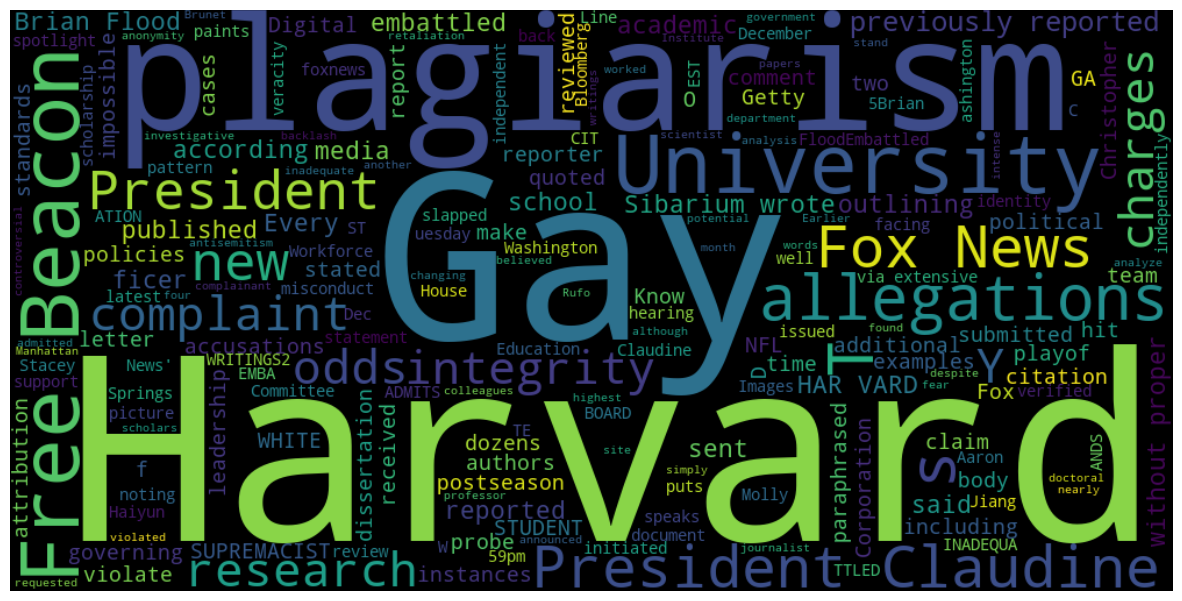

In [69]:
cloud = WordCloud(stopwords=STOPWORDS, width=1000, height=500).generate(text11)
plt.figure(figsize=(15, 10))
plt.imshow(cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

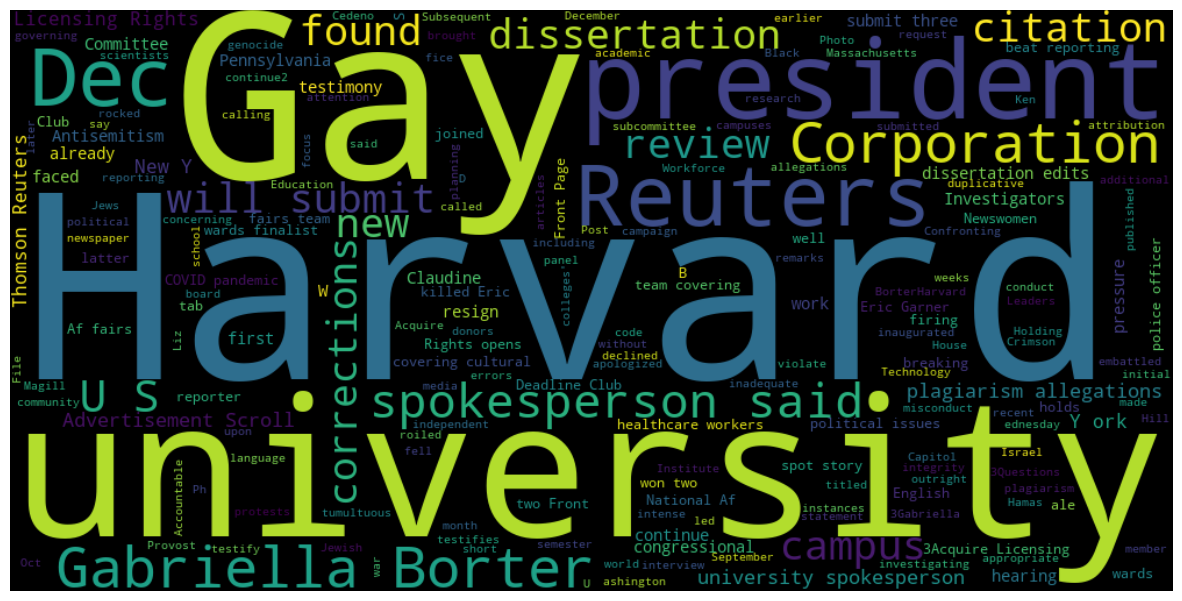

In [70]:
cloud = WordCloud(stopwords=STOPWORDS, width=1000, height=500).generate(text22)
plt.figure(figsize=(15, 10))
plt.imshow(cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

From these word clouds, one can get a gist of the sentiment in the text and a brief overview of the contents as well.